In [21]:
import pandas as pd

df = pd.read_csv("customer.csv")

df["score_date"] = pd.to_datetime(df["score_date"], format="%d-%m-%Y", errors="coerce")

def clean_binary_columns(df, columns):
    for col in columns:
        df[col] = df[col].apply(lambda x: 1 if x == 1 else 0)
    return df

binary_cols = [
    "segment_smb", "segment_non_smb", "segment_commercial", "segment_enterprise", "segment_midmarket",
    "region_emea", "region_apac", "region_latam", "region_amer",
    "sales_assisted", "legacy_flag", "billing_dunning_not_ok", "crm_success_owner_change"
]
df = clean_binary_columns(df, binary_cols)


df = df[(df["customer_age_quarters"] >= 1) & (df["customer_age_quarters"] <= 80)]

df["crm_industry_current"] = df["crm_industry_current"].fillna("Unknown")


valid_employee_ranges = [
    "1 - 9", "10 - 49", "50 - 99", "100 - 249", "250 - 499",
    "500 - 999", "1000 - 4999", "5000+"
]

if 'crm_employee_range' in df.columns:
    df['crm_employee_range'] = df['crm_employee_range'].astype(str).str.strip()

    df['crm_employee_range'] = df['crm_employee_range'].apply(
        lambda x: "Unknown" if any(month in x for month in 
                                   ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
                                    "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]) else x
    )

    df['crm_employee_range'] = df['crm_employee_range'].apply(
        lambda x: x if x in valid_employee_ranges else "Unknown"
    )

    df['crm_employee_range'] = df['crm_employee_range'].astype('category')

df.to_csv("customer_cleaned.csv", index=False)

print("Data cleaning completed. Cleaned file saved as 'customer_cleaned.csv'.")


Data cleaning completed. Cleaned file saved as 'customer_cleaned.csv'.


In [22]:
df=pd.read_csv("customer_cleaned.csv")


In [23]:
df.nunique()

id                          1049
score_date                    13
segment_smb                    2
segment_non_smb                2
segment_commercial             2
segment_enterprise             2
segment_midmarket              2
region_emea                    2
region_apac                    2
region_latam                   2
region_amer                    2
customer_age_quarters         26
sales_assisted                 2
legacy_flag                    1
product_counts                 7
billing_dunning_not_ok         2
crm_industry_current          16
crm_employee_range             7
crm_success_owner_change       2
dtype: int64

In [25]:
df.head(30)

,id,score_date,segment_smb,segment_non_smb,segment_commercial,segment_enterprise,segment_midmarket,region_emea,region_apac,region_latam,region_amer,customer_age_quarters,sales_assisted,legacy_flag,product_counts,billing_dunning_not_ok,crm_industry_current,crm_employee_range,crm_success_owner_change
0,JMAN_2429072,2023-02-10,1,0,0,0,0,1,0,0,0,13,1,0,2,0,"Retail, Wholesale & Distribution",100 - 249,0
1,JMAN_9043466,2023-01-13,0,1,1,0,0,1,0,0,0,16,1,0,4,0,"Retail, Wholesale & Distribution",250 - 499,0
2,JMAN_2452556,2023-02-24,0,1,0,0,0,1,0,0,0,17,0,0,5,0,Unknown,Unknown,0
3,JMAN_2455113,2023-03-03,0,1,0,0,0,1,0,0,0,17,0,0,3,0,Unknown,Unknown,0
4,JMAN_18127937,2023-02-10,0,1,0,0,0,1,0,0,0,17,0,0,1,0,Unknown,Unknown,0
5,JMAN_2373631,2023-03-03,0,1,0,0,0,0,0,0,1,17,0,0,4,0,Corporate Services,Unknown,0
6,JMAN_2447279,2023-03-03,1,0,0,0,0,0,0,0,1,17,0,0,2,0,"Retail, Wholesale & Distribution",50 - 99,0
7,JMAN_9004478,2023-01-20,1,0,0,0,0,0,1,0,0,17,1,0,4,0,"Retail, Wholesale & Distribution",50 - 99,0
8,JMAN_2477864,2023-03-24,1,0,0,0,0,0,1,0,0,17,0,0,2,0,"Retail, Wholesale & Distribution",50 - 99,0
9,JMAN_2445629,2023-01-20,0,1,0,0,0,0,0,0,1,16,1,0,1,0,Technology,Unknown,0


<AxesSubplot: xlabel='crm_industry_current'>

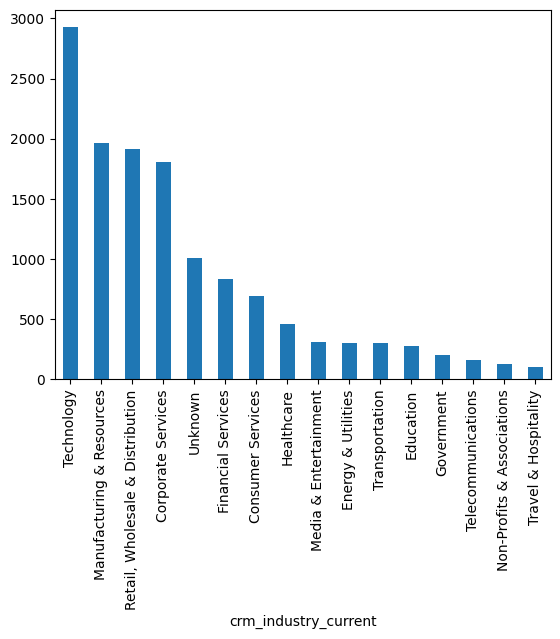

In [27]:
df["crm_industry_current"].value_counts().plot(kind='bar')

In [28]:
df.isnull().sum()

id                          0
score_date                  0
segment_smb                 0
segment_non_smb             0
segment_commercial          0
segment_enterprise          0
segment_midmarket           0
region_emea                 0
region_apac                 0
region_latam                0
region_amer                 0
customer_age_quarters       0
sales_assisted              0
legacy_flag                 0
product_counts              0
billing_dunning_not_ok      0
crm_industry_current        0
crm_employee_range          0
crm_success_owner_change    0
dtype: int64